# Exploratory Data Analysis
This notebook handles:
1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis
4. Target Variable Analysis

In [85]:
import pandas as pd

df = pd.read_csv("../data/ENGINEERED_Melbourne_Housing_Market.csv")
df["SaleDate"] = pd.to_datetime(df["SaleDate"])
df.head()

,SaleDate,CouncilArea,RealEstateAgent,RegionName,SaleMethod,StreetName,StreetType,Suburb,UnitType,AvgRoomSize,...,DistanceToCBD,LandSize,Latitude,Longitude,NeighbouringProperties,Postcode,PropertyAge,Rooms,YearBuilt,Price
0,2016-03-12,Yarra_City,Biggin,Northern_Metropolitan,Sold,Turner,Street,Abbotsford,House,66.500000,...,2.5,202.0,-37.7996,144.9984,4019.0,3067.0,46.0,2.0,1970.0,1480000.0
1,2016-04-02,Yarra_City,Biggin,Northern_Metropolitan,Sold,Bloomburg,Street,Abbotsford,House,39.500000,...,2.5,156.0,-37.8079,144.9934,4019.0,3067.0,116.0,2.0,1900.0,1035000.0
2,2017-04-03,Yarra_City,Biggin,Northern_Metropolitan,Sold_Prior,Charles,Street,Abbotsford,House,50.000000,...,2.5,134.0,-37.8093,144.9944,4019.0,3067.0,117.0,3.0,1900.0,1465000.0
3,2017-04-03,Yarra_City,Biggin,Northern_Metropolitan,Passed_In,Federation,Lane,Abbotsford,House,44.333333,...,2.5,94.0,-37.7969,144.9969,4019.0,3067.0,47.0,3.0,1970.0,850000.0
4,2016-04-06,Yarra_City,Nelson,Northern_Metropolitan,Vendor_Bid,Park,Street,Abbotsford,House,35.500000,...,2.5,120.0,-37.8072,144.9941,4019.0,3067.0,2.0,4.0,2014.0,1600000.0


In [86]:
from data_manipulation import exploratory_data_analysis as eda

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27247 entries, 0 to 27246
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   SaleDate                27247 non-null  datetime64[ns]
 1   CouncilArea             27247 non-null  object        
 2   RealEstateAgent         27247 non-null  object        
 3   RegionName              27247 non-null  object        
 4   SaleMethod              27247 non-null  object        
 5   StreetName              27247 non-null  object        
 6   StreetType              27247 non-null  object        
 7   Suburb                  27247 non-null  object        
 8   UnitType                27247 non-null  object        
 9   AvgRoomSize             27247 non-null  float64       
 10  Bathrooms               27247 non-null  float64       
 11  Bedrooms                27247 non-null  float64       
 12  BuildingArea            27247 non-null  float6

## Univariate Analysis

In [88]:
df_description = eda.get_custom_description(df)
df_description

,SaleDate,CouncilArea,RealEstateAgent,RegionName,SaleMethod,StreetName,StreetType,Suburb,UnitType,AvgRoomSize,...,DistanceToCBD,LandSize,Latitude,Longitude,NeighbouringProperties,Postcode,PropertyAge,Rooms,YearBuilt,Price
Cardinality,NaN,33.0,345.0,8.0,5.0,6724.0,83.0,343.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Majority,NaN,Boroondara_City,Nelson,Southern_Metropolitan,Sold,The,Street,Reservoir,House,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MajorityPercentage,NaN,0.09,0.1,0.31,0.64,0.01,0.49,0.03,0.68,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Min,2016-01-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,-38.19,144.42,83.0,3000.0,-2.0,1.0,1196.0,85000.0
Max,2018-10-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8903.0,...,48.1,433014.0,-37.4,145.53,21650.0,3978.0,821.0,16.0,2019.0,11200000.0
Range,979 days 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8903.0,...,48.1,433014.0,0.79,1.1,21567.0,978.0,823.0,15.0,823.0,11115000.0
Skewness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.04,...,1.48,111.33,-0.42,-0.44,1.02,3.98,2.19,0.51,-2.19,2.59
IQR,378 days 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.33,...,7.6,241.0,0.08,0.09,6118.0,107.0,2.0,2.0,0.0,660000.0
IQROutliers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1127.0,...,1188.0,992.0,1723.0,2210.0,727.0,794.0,10592.0,23.0,10890.0,1278.0
Kurtosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16411.85,...,3.48,15040.91,2.72,2.79,0.92,21.95,38.8,2.81,38.55,13.1


### Feature Removal

Removing these features do to high cardinality

In [89]:
from data_manipulation.feature_engineering import remove_column

df = remove_column(df, "StreetName")

Removing these features do to having a dominant category


In [90]:
df = remove_column(df, "SaleMethod")
df = remove_column(df, "StreetType")
df = remove_column(df, "UnitType")

Removing Z-Score outliers instead of IQR outliers since some of the outliers are actually meaningful

In [91]:
df = eda.remove_outliers(df, "zcore")

### Univariate Plots

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

df.columns

Index(['SaleDate', 'CouncilArea', 'RealEstateAgent', 'RegionName', 'Suburb',
       'AvgRoomSize', 'Bathrooms', 'Bedrooms', 'BuildingArea',
       'BuildingToLandRatio', 'CarSpots', 'DistanceToCBD', 'LandSize',
       'Latitude', 'Longitude', 'NeighbouringProperties', 'Postcode',
       'PropertyAge', 'Rooms', 'YearBuilt', 'Price'],
      dtype='object')

<Axes: xlabel='SaleDate', ylabel='Density'>

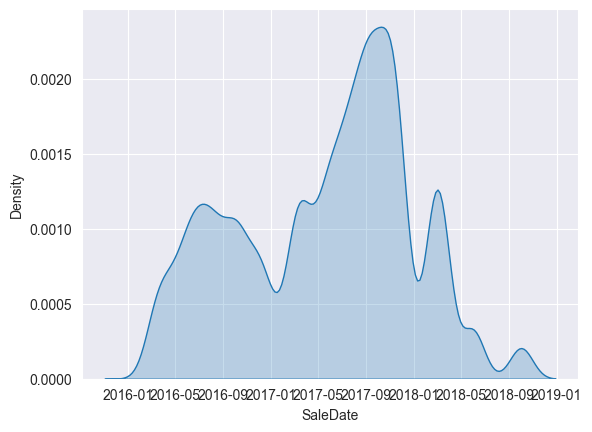

In [93]:
sns.kdeplot(data=df, x="SaleDate", fill=True)

In [94]:
def pie_plot(series: pd.Series, top_x: int = 7) -> None:
    series_values = series.value_counts()
    top_x_values = series_values[:top_x]
    other = series_values[top_x:].sum()
    combined = pd.concat([top_x_values, pd.Series({'Other': other})])
    plt.pie(combined, labels=combined.index, autopct='%1.1f%%')
    plt.title(f"{series.name} Distribution")

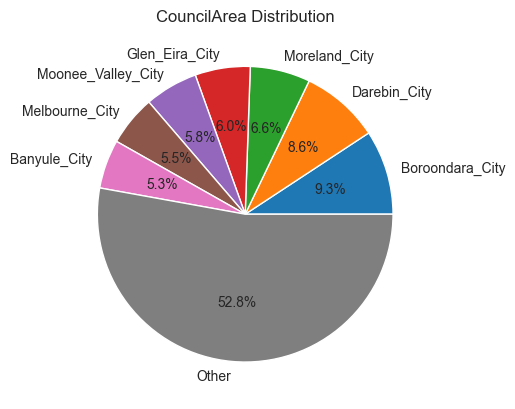

In [95]:
pie_plot(df["CouncilArea"])

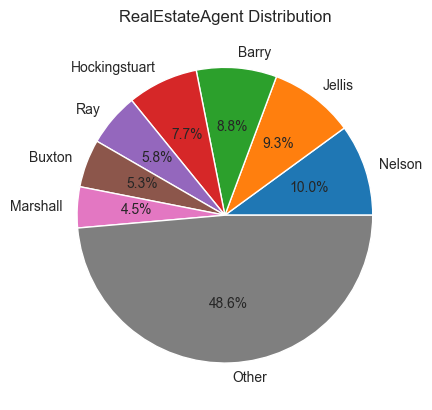

In [96]:
pie_plot(df["RealEstateAgent"])

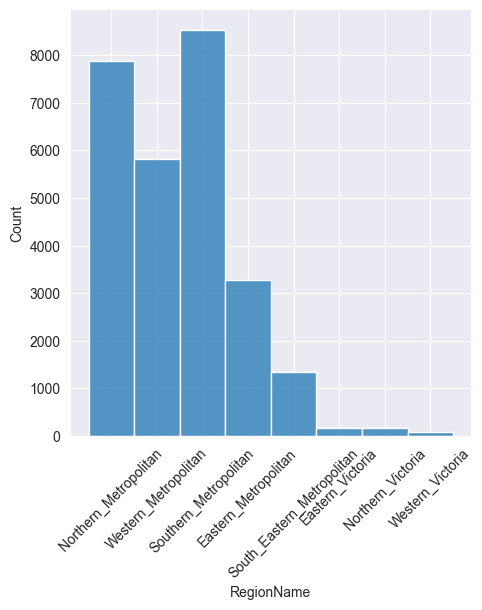

In [97]:
sns.displot(data=df, x="RegionName")
plt.xticks(rotation=45)
plt.show()

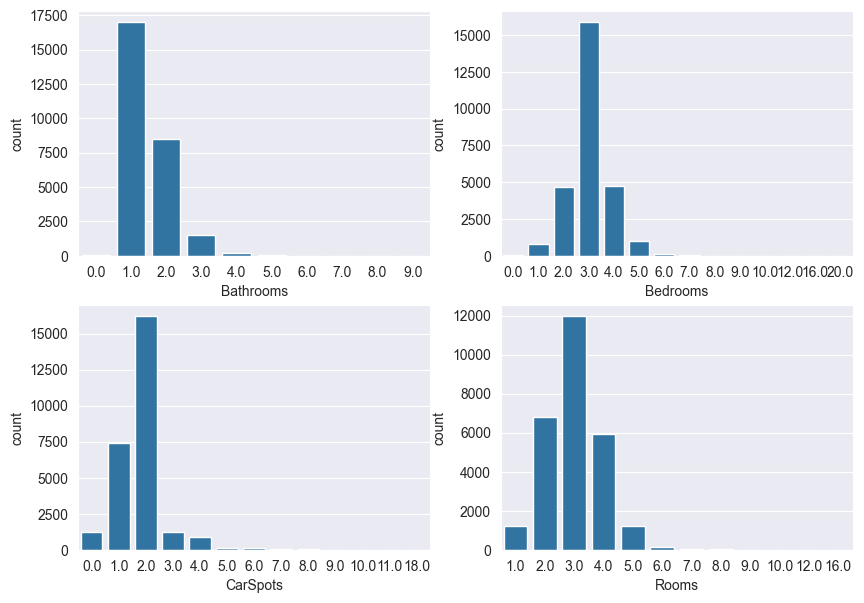

In [98]:
columns = ["Bathrooms", "Bedrooms", "CarSpots", "Rooms"]
plt.figure(figsize=(10, 7))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=column)
plt.show()

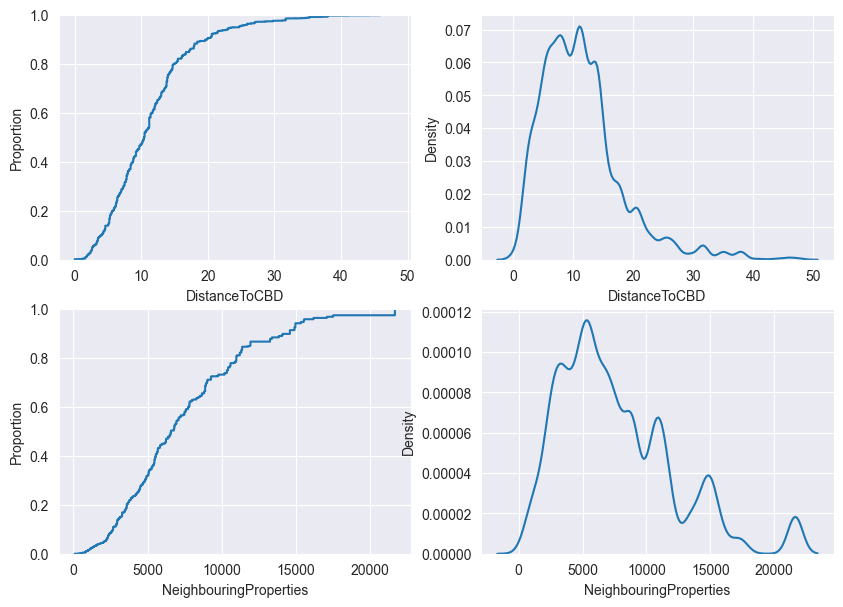

In [99]:
columns = ["DistanceToCBD", "DistanceToCBD", "NeighbouringProperties", "NeighbouringProperties"]
plt.figure(figsize=(10, 7))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    if i % 2:
        sns.ecdfplot(data=df, x=column)
    else:
        sns.kdeplot(data=df, x=column)
plt.show()

<Axes: xlabel='Postcode'>

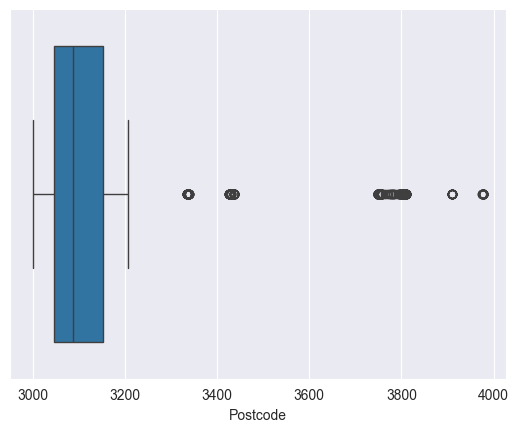

In [102]:
sns.boxplot(data=df, x="Postcode")